<a href="https://colab.research.google.com/github/zzhining/wallmart_dataset_analysis/blob/main/notebook/wallmart_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle.json 업로드

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"luna999999","key":"51e29a8bd5537f4b4fb7424e71a3661b"}'}

# kaggle 폴더 생성 및 파일 이동

In [2]:
# ctrl + v
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 66 Sep 26 10:10 kaggle.json
/content


# 권한 설정

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

# 데이터 셋 다운로드

In [4]:
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
walmart-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# 데이터셋 압축 해제

In [5]:
import zipfile

with zipfile.ZipFile('walmart-sales-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# 데이터 불러오기

In [6]:
import pandas as pd

df = pd.read_csv('data/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# EDA

In [18]:
# 전체 데이터가 몇 개 있는것인가? 550068개
df.shape

(550068, 10)

전체 550,068개의 인스턴스가 있는 것으로 확인되었습니다.

In [20]:
# 몇 명의 User에 대한 정보가 있는 것인가? (`User_ID`의 개수)
df['User_ID'].nunique()
# len(df['User_ID'].value_counts())

5891

총 5,891명의 사용자에 대한 거래 내역이 담겨있는 데이터 입니다.

<Axes: xlabel='count', ylabel='Age'>

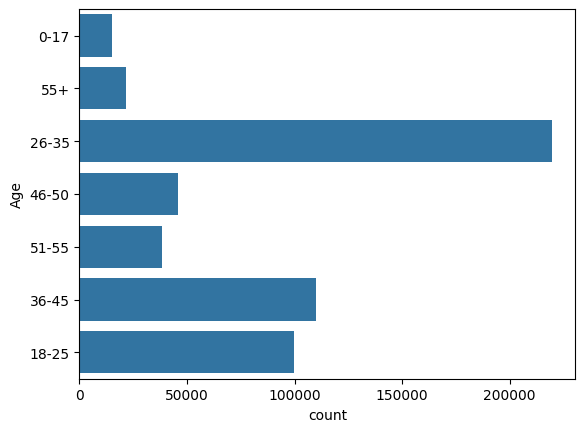

In [29]:
import seaborn as sns

sns.countplot(df['Age'])
# df['Age'].value_counts() # 표 형태로 보고 싶을 경우

26~35세의 연령대가 가장 많은 방문을 한 것을 알 수 있습니다.

<Axes: xlabel='Purchase', ylabel='Count'>

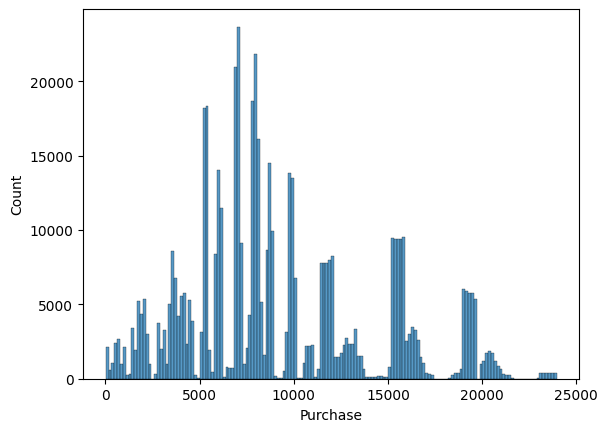

In [30]:
sns.histplot(df['Purchase'])

구입한 제품의 가격의 분포는 0 ~ 25000사이로, 5000 ~ 10000사이의 구매 가격이 가장 많은 것으로 알 수 있습니다.

In [27]:
# - `Product_ID`의 수, `Gender`, `Age` , `Occupation` `City_Category`,... 각 컬럼의 값의 유일값, 분포
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [35]:
# 어떤 제품(`Product_ID`)가 제일 비쌀까? 그 제품은 어떤 카테고리인가?
df.sort_values(by='Purchase', ascending=False).head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960
349658,1005848,P00119342,M,51-55,20,A,0,1,10,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,23960
298378,1003947,P00116142,M,26-35,0,C,3,0,10,23959
437804,1001387,P00086242,F,51-55,13,B,1,1,10,23959
229329,1005367,P00085342,M,18-25,4,A,1,0,10,23958


<Axes: xlabel='Purchase', ylabel='Count'>

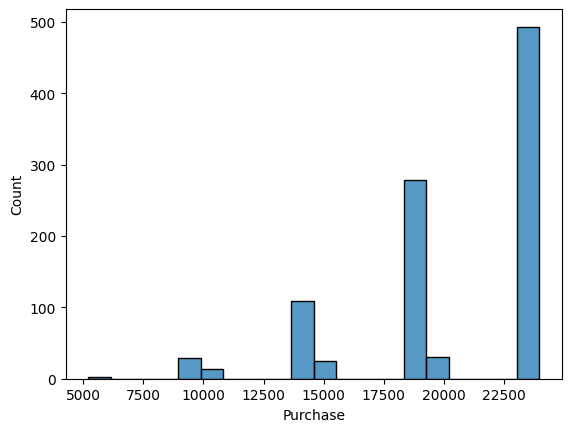

In [34]:
sns.histplot(df[df['Product_ID']=='P00052842']['Purchase'])

In [ ]:
# - 가장 많이 팔린 제품은?
df['Product_ID'].value_counts()[:10]

In [44]:
df.groupby('Product_ID').size().sort_values(ascending=False)[:10]#.head(10)

,0
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00145042,1406


In [45]:
# Wallmart를 자주 찾는 사용자의 직업군은?
df['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


- `구매금액`과 `사용자 성별`간의 관계
- `구매금액`과 `결혼 상태`간의 관계